In [1]:
from sklearn.datasets import fetch_openml
from interpret.glassbox import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


In [2]:

mnist = fetch_openml('mnist_784',parser="auto")
X= mnist.data
Y=mnist.target


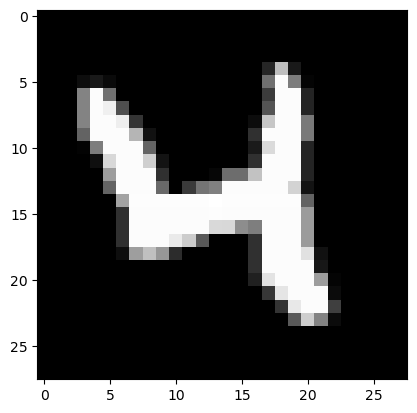

Annotation 4


In [3]:

row=X.iloc[20, :]
row_array = row.to_numpy()   
#la ligne du dataframe en array pour reshape en 
img = row_array.reshape(28,28)
imgplot = plt.imshow(img, cmap='gray') 
plt.show()
print('Annotation',Y[20])

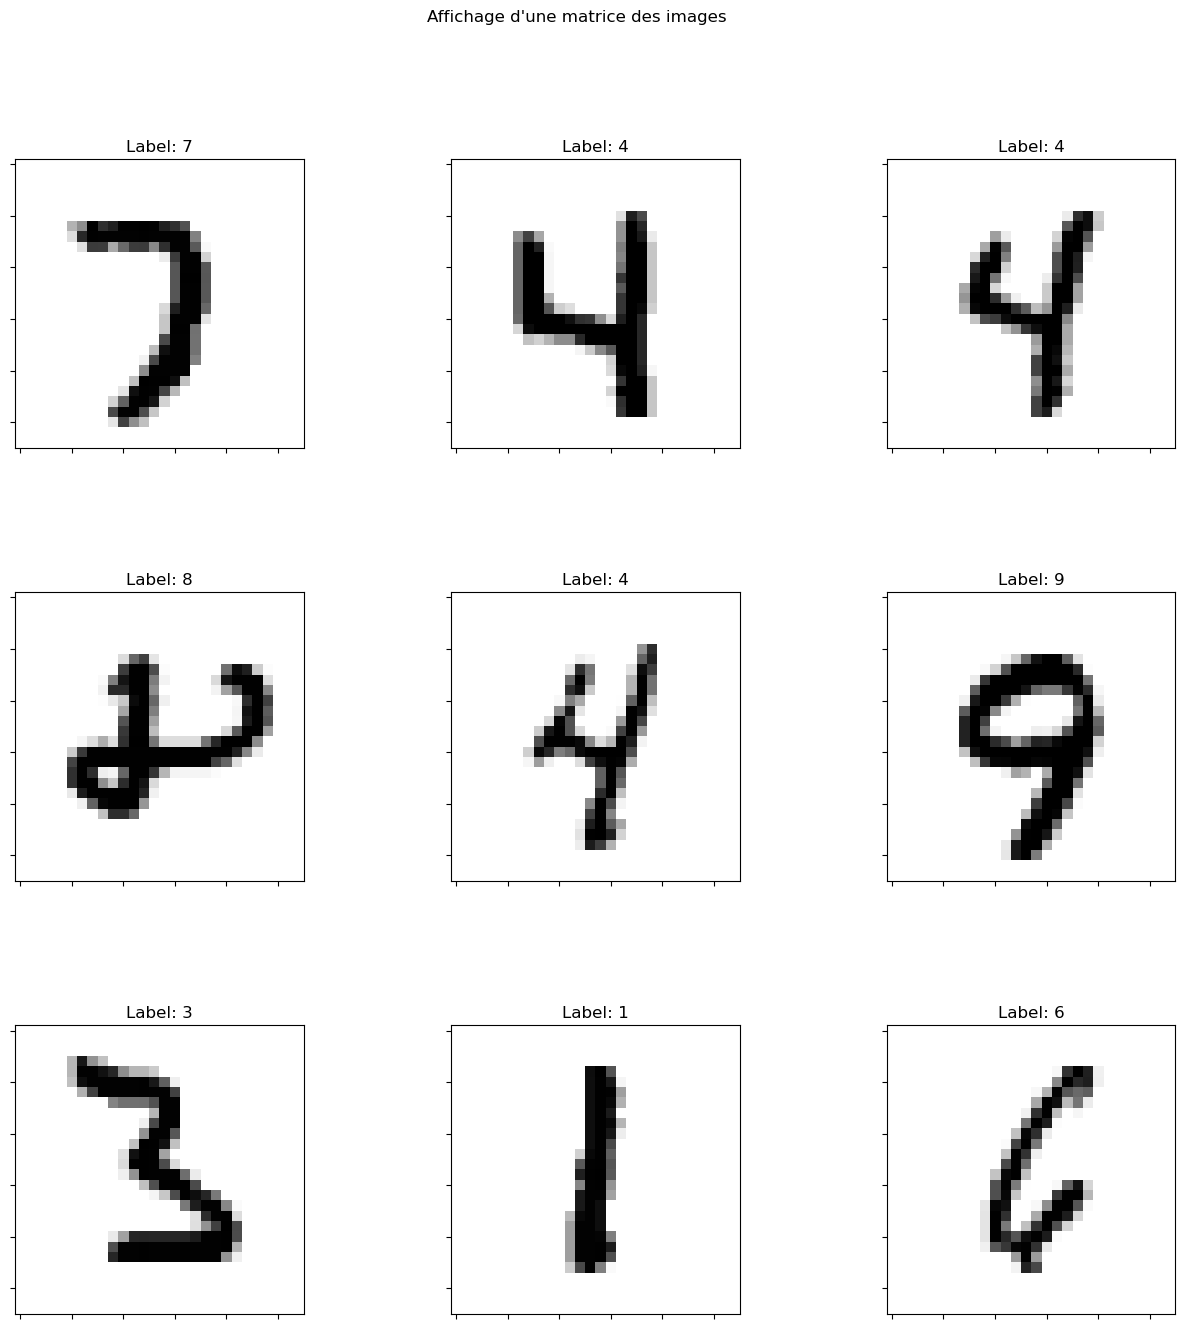

In [4]:
def AffichageMatriceImage(X,Y):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15)) 
    fig.suptitle( "Affichage d'une matrice des images")
    ind = 0
    for i in range(3):
        for j in range(3):
            ind = np.random.randint(X.shape[0])
            #print(ind)
            tmp = X.iloc[ind,:].to_numpy()
            tmp=tmp.reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind])) 
            ax[i,j].imshow(tmp, cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False) 
            plt.setp(ax[i,j].get_yticklabels(), visible=False) 
    fig.subplots_adjust(hspace=0.5, wspace=0.5) 

AffichageMatriceImage(X,Y)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y=encoder.fit_transform(Y.astype(str))
Y

array([5, 0, 4, ..., 4, 5, 6])

In [6]:
#preprocess


In [7]:
#regarder par des histogrammes les données.
def show_hist(n,X,Y) :
    ind=0
    for i in range(n) :
        ind = np.random.randint(X.shape[0])
        print("nombre : ",Y[ind])
        X.iloc[ind,:].hist()
        plt.show()


In [8]:
#diviser pour avoir des données d'apprentissage et des données tests 

from sklearn. model_selection import train_test_split

def get_data_split(X,Y):
    return train_test_split(X, Y, test_size=0.20, random_state=2021)

X_train, X_test, y_train, y_test=get_data_split(X,Y)


array([1, 0, 9, ..., 7, 3, 6])

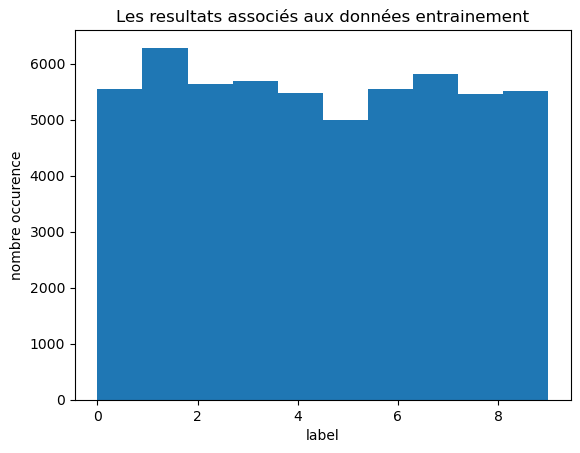

In [9]:
#check le nombre de label qu'on à pour qu'il n'y ait pas un desiquilibre 
def test_data_check (train_result) :
    plt.hist(train_result)
    plt.title('Les resultats associés aux données entrainement')
    plt.ylabel('nombre occurence')
    plt.xlabel('label')

test_data_check(y_train)
y_train

In [ ]:
#fit LogisticRegression Model
#solver : lbfgs
#max iter = 1000

lr = LogisticRegression(random_state=0,solver='lbfgs',max_iter=3000)
lr.fit(X_train, y_train)
print("Training finished.")


In [ ]:
#Evaluate the Model

y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}") 
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

In [ ]:
def AffichageMatricePrediction(X,Y,Ypred):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10,10)) 
    fig.suptitle( "Affichage d'une matrice des images avec la prediction du model")
    ind = 0
    for i in range(5):
        for j in range(5):
            ind = np.random.randint(X.shape[0])
            #print(ind)
            tmp = X.iloc[ind,:].to_numpy()
            tmp=tmp.reshape(28,28)
            ax[i,j].set_title("Label: {} Prediction : {}".format(Y[ind]),format(Ypred[ind])) 
            ax[i,j].imshow(tmp, cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False) 
            plt.setp(ax[i,j].get_yticklabels(), visible=False) 
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
AffichageMatricePrediction(X_test,y_test,y_pred)